Importing necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from collections import Counter

Download the descriptors.xlsx file from the below link:

https://docs.google.com/spreadsheets/d/1Ol8EoQgm4zpU2a7Ua-oel0ToStGm5RFP/edit?usp=sharing&ouid=100649499519673681088&rtpof=true&sd=true

In [2]:
#Reading the data
features = pd.read_excel("descriptors.xlsx", sheet_name="DFT_data")

In [3]:
#Finding the number of null values present
print(features.isnull().sum().sum())

140


In [4]:
#Removing the rows with atleast one null value
features = features.dropna(axis = 0)
print(features.isnull().sum().sum())

0


In [5]:
smiles_column = features['smiles']
id_column = features['ID']

In [6]:
features = features.drop(['smiles', 'ID'], axis=1)

In [7]:
features.head()

,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,nbo_P_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,-0.363712,0.801914,...,7.439480,6.306577,7.835474,1.528897,7.262693,7.291573,7.106519,8.238802,1.132283,7.735548
1,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,-0.345264,0.816302,...,6.572514,6.339063,7.850955,1.511892,6.407769,7.285463,6.908743,8.216943,1.308200,7.992698
2,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,-0.356952,0.796412,...,7.156276,6.349086,7.287324,0.938238,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874
3,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,-0.349017,0.798225,...,7.238774,6.369287,7.813010,1.443723,7.653520,7.338674,6.996319,8.333428,1.337110,7.483233
4,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,-0.376125,0.787516,...,6.497622,6.092458,7.055260,0.962802,6.376705,7.370445,7.021018,8.155038,1.134020,8.086289


**Applying PCA**

In [8]:
#Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
pca = PCA()
features_PCA = pca.fit_transform(features_scaled)

In [10]:
features_loadings = pd.DataFrame(pca.components_)
features_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,-0.036017,-0.028825,0.068124,-0.053397,-0.001752,-0.092822,0.035523,-0.092713,0.110422,-0.020627,...,0.103507,0.101129,0.103351,0.023162,0.104130,0.057996,0.050561,0.065560,0.006913,0.064238
1,-0.090092,-0.077657,0.071540,0.039279,0.068149,-0.012704,-0.052247,0.026718,0.010571,-0.088085,...,-0.030128,0.009680,-0.059077,-0.088035,-0.008854,0.002690,0.072756,-0.050080,-0.095477,-0.028340
2,-0.070942,-0.059349,0.025519,0.119531,0.101760,0.089279,-0.118591,0.112793,-0.027880,0.029802,...,-0.004861,-0.058104,0.027611,0.100526,-0.021551,-0.019610,-0.081625,0.089203,0.131219,0.048866
3,0.134703,0.111248,-0.075651,-0.040924,-0.071617,0.013978,0.054274,-0.021216,-0.031936,0.179833,...,-0.006316,0.030842,-0.028121,-0.070980,0.026323,0.008159,0.003800,-0.038524,-0.031200,-0.028447
4,-0.031071,-0.019103,0.042925,0.041223,0.053849,0.008073,-0.060062,0.019666,0.053627,0.077540,...,0.055657,0.059454,0.047993,-0.003089,0.055121,0.078026,0.051557,0.001348,-0.040767,0.002488


Scree Plot representing the amount of variance explained by variable number of PCA

The first 4 variables explain around 59% of the variance

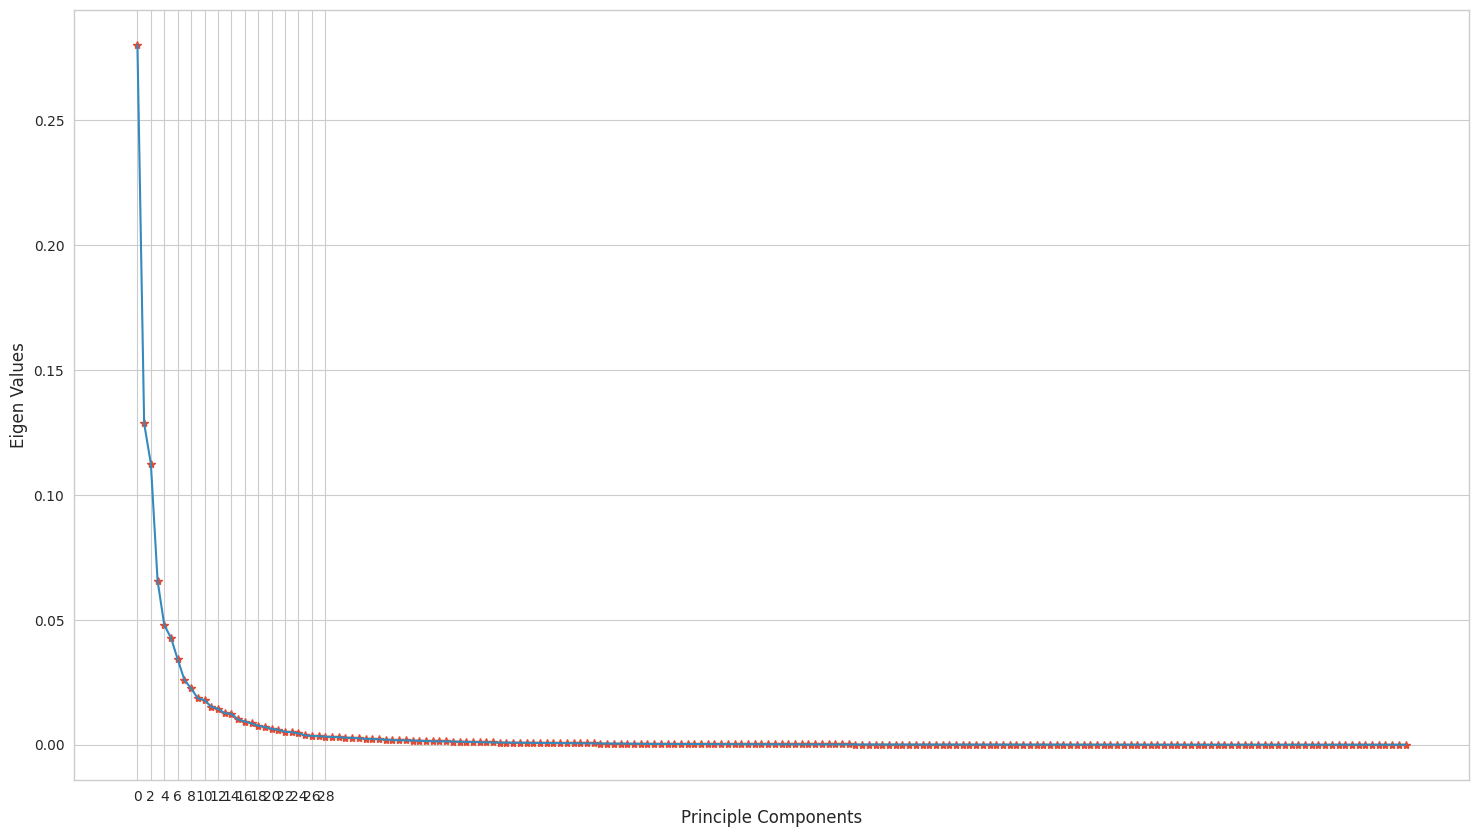

In [11]:
sns.set_style(style='whitegrid', rc=None)

plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,30,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

Proportion of variance plot

In [12]:
cov_matrix = np.cov(features_PCA.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

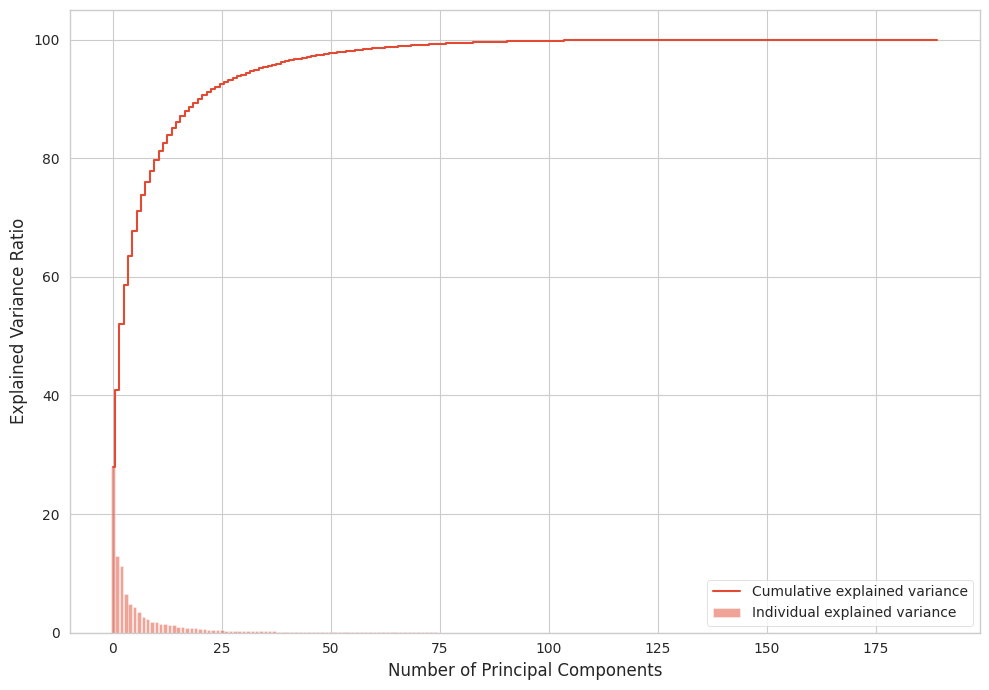

In [13]:
plt.figure(figsize=(10, 7))
plt.bar(range(190), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(190), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [14]:
pca4 = PCA(n_components=4)
pca4.fit(features_scaled)

PCA(n_components=4)

In [15]:
print(pca4.components_)

[[-0.03601704 -0.02882523  0.06812403 -0.05339745 -0.00175161 -0.09282236
   0.03552279 -0.09271345  0.11042236 -0.02062702  0.00869799 -0.07955639
  -0.04016108 -0.02238738  0.03405067  0.04222189  0.03832439 -0.00159537
  -0.02705381  0.0264593  -0.01139361 -0.02461116 -0.04304962 -0.10324359
  -0.05979605 -0.05473002  0.06173371  0.03355774  0.04578891  0.04178969
   0.04299418 -0.05601513 -0.07692611 -0.02878971 -0.02422955 -0.11511612
  -0.09321332 -0.0912751  -0.0757203  -0.08476064 -0.02782847  0.12726592
  -0.08545692  0.1193122   0.10925432  0.04752423  0.12060193  0.12701114
   0.12563864 -0.10907007  0.01964769  0.00528554  0.02584848  0.02713032
   0.01708821  0.05126578  0.04031969  0.05692096  0.04526588  0.05620073
   0.05157063  0.03840784  0.05693661  0.04625523  0.05434694 -0.00319805
  -0.03875646  0.03477502  0.04777621 -0.00052967 -0.04870864 -0.05514456
  -0.03734305  0.04443593 -0.05443221 -0.04717569 -0.05757468 -0.04634576
   0.0325263  -0.05971123  0.05150693 

In [16]:
print(pca4.explained_variance_ratio_.sum())

0.5867762660628185


In [17]:
features_pca4 = pca4.transform(features_scaled)

In [18]:
print(features_pca4)

[[11.25423477 -0.72455371  7.78134046 -3.23848962]
 [ 8.84225345  0.53787004  6.76790982 -2.81268556]
 [ 7.11377676  0.79685614  5.06010078 -2.49144718]
 ...
 [15.64991034  3.39682088  5.38555474  0.35784971]
 [-1.78127822  4.03995246 -1.18378189  2.79749282]
 [12.53052681  2.20580083  3.74917902  0.27287853]]


In [19]:
reduced_features = pd.DataFrame(features_pca4, columns =['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [20]:
reduced_features

,PCA1,PCA2,PCA3,PCA4
0,11.254235,-0.724554,7.781340,-3.238490
1,8.842253,0.537870,6.767910,-2.812686
2,7.113777,0.796856,5.060101,-2.491447
3,10.816068,-1.621085,7.495190,-3.162745
4,5.135692,1.275891,6.619478,-2.475400
...,...,...,...,...
1539,5.929931,-1.479470,1.003525,-2.378683
1540,-2.918561,-0.262702,3.898758,4.224470
1541,15.649910,3.396821,5.385555,0.357850
1542,-1.781278,4.039952,-1.183782,2.797493


In [21]:
smiles_array = smiles_column.to_numpy()
id_array = id_column.to_numpy()

In [22]:
reduced_features.insert(0, "ID", id_array, True)
reduced_features.insert(1, "smiles", smiles_array, True)

In [23]:
reduced_features.head()

,ID,smiles,PCA1,PCA2,PCA3,PCA4
0,1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,11.254235,-0.724554,7.781340,-3.238490
1,2,CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,8.842253,0.537870,6.767910,-2.812686
2,3,COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,7.113777,0.796856,5.060101,-2.491447
3,4,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,10.816068,-1.621085,7.495190,-3.162745
4,5,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,5.135692,1.275891,6.619478,-2.475400


In [24]:
file_name = 'reduced_features_PCA.xlsx'
reduced_features.to_excel(file_name, index = False)

#**Clustering**

In [28]:
PCA_features = pd.read_excel("reduced_features_PCA.xlsx", index_col = 0)

In [26]:
PCA_features

,smiles,PCA1,PCA2,PCA3,PCA4
ID,,,,,
1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,11.254235,-0.724554,7.781340,-3.238490
2,CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,8.842253,0.537870,6.767910,-2.812686
3,COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,7.113777,0.796856,5.060101,-2.491447
4,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,10.816068,-1.621085,7.495190,-3.162745
5,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,5.135692,1.275891,6.619478,-2.475400
...,...,...,...,...,...
1904,COc1cccc(OC)c1-c1ccccc1-p1c2ccccc2c2ccccc21,5.929931,-1.479470,1.003525,-2.378683
1905,CN1c2ccccc2N2c3ccccc3N(C)P12,-2.918561,-0.262702,3.898758,4.224470
1906,c1ccc([C-](P(C2CCCCC2)C2CCCCC2)[P+](C2CCCCC2)(...,15.649910,3.396821,5.385555,0.357850


Download the phoss_filters.csv file from the below link:

https://drive.google.com/file/d/1eURWFTePu-FufsVAjV8Zo-rcm1XBAa5X/view?usp=sharing

In [30]:
filters = pd.read_csv("phoss_filters.csv", index_col = 0)

In [31]:
filters

,smiles,pat,pat_enc,ph,ph3,pb,pb3,pc,pc3,pn,...,pon,par3,buch,ring,com,PHOSS,yield_casestudy_A,yield_casestudy_B,yield_casestudy_C,yield_casestudy_D
1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,pc3,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,66.0,25.5,NaN,NaN
2,CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,pc3,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,NaN,NaN,NaN,NaN
3,COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,pc3,0,0,0,0,0,1,1,0,...,0,0,1,0,1,1,53.5,92.0,87.222270,0.005
4,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,pc3,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,51.5,3.0,74.482051,NaN
5,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,pc3,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,51.0,21.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,COc1cccc(OC)c1-c1ccccc1-p1c2ccccc2c2ccccc21,pc3,0,0,0,0,0,1,1,0,...,0,1,1,1,0,0,NaN,NaN,NaN,NaN
1905,CN1c2ccccc2N2c3ccccc3N(C)P12,pn3,4,0,0,0,0,0,0,1,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
1906,c1ccc([C-](P(C2CCCCC2)C2CCCCC2)[P+](C2CCCCC2)(...,pc3,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
1907,CC(C)(C)N1P(c2ccccc2)N(C(C)(C)C)[Si]1(C)C,pcn,5,0,0,0,0,1,0,1,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN


Getting indices of rows after applying filters

After applying commercial availability filters and phophines only filters, we are left with 319 compounds in the dataset

In [32]:
criterion1 = set(filters.loc[filters["com"] == 1].index)
criterion2 = set(filters.loc[filters["pat"] == "pc3"].index)

use_rows = sorted(criterion1 & criterion2)

print(len(use_rows))

319


In [41]:
use_cols = ["PCA1","PCA2","PCA3","PCA4"]
features_kmeans = PCA_features.loc[use_rows, use_cols]

kmeans = KMeans(n_clusters = 32, random_state = 1).fit(features_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
def dist_to_center(line):
    delta = line[use_cols] - kmeans.cluster_centers_[line["cluster"]]
    dist = np.linalg.norm(delta)
    return(dist)

In [43]:
fkmeans_copy = PCA_features.loc[use_rows].copy()
fkmeans_copy["closest_to_center"] = 0
fkmeans_copy["cluster"] = kmeans.labels_
fkmeans_copy["distance_to_center"] = fkmeans_copy.apply(dist_to_center, axis = 1)

In [44]:
clustermins = []
for clusternumber in range(32):
    min_to_center_idx = fkmeans_copy[fkmeans_copy["cluster"] == clusternumber]["distance_to_center"].idxmin()
    clustermins.append(min_to_center_idx)
    fkmeans_copy.loc[min_to_center_idx,"closest_to_center"] = 1

In [45]:
clustercounts = Counter(fkmeans_copy["cluster"])
print("cluster: N(samples)")
for i in sorted(clustercounts.keys()):
    print(f"{i}: {clustercounts[i]}")

cluster: N(samples)
0: 12
1: 8
2: 11
3: 6
4: 8
5: 6
6: 7
7: 11
8: 11
9: 33
10: 3
11: 13
12: 6
13: 7
14: 3
15: 2
16: 30
17: 15
18: 9
19: 3
20: 1
21: 13
22: 13
23: 13
24: 9
25: 5
26: 13
27: 11
28: 3
29: 21
30: 3
31: 10


In [46]:
fkmeans_copy

,smiles,PCA1,PCA2,PCA3,PCA4,closest_to_center,cluster,distance_to_center
ID,,,,,,,,
1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,11.254235,-0.724554,7.781340,-3.238490,1,12,2.097305
2,CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,8.842253,0.537870,6.767910,-2.812686,0,29,2.199630
3,COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,7.113777,0.796856,5.060101,-2.491447,0,29,1.851873
4,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,10.816068,-1.621085,7.495190,-3.162745,0,12,2.163724
5,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,5.135692,1.275891,6.619478,-2.475400,0,1,2.119472
...,...,...,...,...,...,...,...,...
1408,c1ccc(CCP(c2ccccc2)c2ccccc2)cc1,0.312955,-1.777637,0.236335,-3.829490,0,7,3.014036
1900,COc1ccc(OC)c(P2C(C)(C)CC3(CC2(C)C)OCCO3)c1-c1c...,15.090255,2.904029,2.250482,2.134056,0,8,2.692782
1901,COc1ccc(-c2c(OC)ccc3ccccc23)c(OC)c1P(C1CCCCC1)...,10.932177,-2.820467,0.381087,-2.582344,0,23,2.400294
